In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_formats = {'png', 'retina'}
plt.style.use('ggplot')

import warnings; warnings.filterwarnings('ignore')
import gc
import datetime

# pandas columns 출력 생략 문제 해결
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_info_columns', 1000)

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import roc_auc_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
import lightgbm as lgb

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve,auc, roc_auc_score, roc_curve,recall_score, classification_report

In [ ]:
train_id = pd.read_csv('./train_identity.csv')
print('Successfully loaded train_identity!')
train_trans = pd.read_csv('./train_transaction.csv')
print('Successfully loaded train_transaction!')

train = pd.merge(train_trans, train_id, on='TransactionID', how='left')
print('Train_Data was successfully merged!')

del train_id, train_trans
print('Successfully deleted!')

gc.collect()
print('Successfully collected!')

Successfully loaded train_identity!
Successfully loaded train_transaction!
Train_Data was successfully merged!
Successfully deleted!
Successfully collected!


In [ ]:
num_cols = list(train.select_dtypes(exclude=['object']).columns) # numerical data만 포함한 column의 이름을 list화
num_cols.remove('isFraud') # 'isFraud' 칼럼 제외

In [ ]:
for col_idx in range(len(num_cols)):
    sns.barplot(x='isFraud', y=num_cols[col_idx], data=train)
    plt.title('Feature: '+ num_cols[col_idx], fontsize = 20) # 그래프 타이틀: feature name
    plt.show()

* A : 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D10', 'D11', 'D13', 'D15', 'V10', 'V11', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49', 'V50', 'V51', 'V52', 'V57', 'V58', 'V59', 'V60', 'V63', 'V64', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V79', 'V80', 'V81', 'V84', 'V85', 'V90', 'V91', 'V92', 'V93', 'V94', 'V101', 'V102', 'V103', 'V129', 'V131', 'V132', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V176', 'V177', 'V178', 'V179', 'V184', 'V185', 'V190', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V209', 'V211', 'V212', 'V213', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V238', 'V239', 'V243', 'V246', 'V252', 'V257', 'V258', 'V259', 'V267', 'V269', 'V271', 'V272', 'V281', 'V283', 'V284', 'V291', 'V293', 'V300', 'V301', 'V302', 'V303', 'V304', 'V309', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V322', 'V323', 'V324', 'V329', 'V330', 'V331', 'V332', 'V333', 'V338', 'V339'
* B1 : 'dist1','C13','D12','V12','V13','V35','V36','V37','V38','V53','V54','V62','V75','V76','V77','V78','V83','V86','V87','V95','V96','V97','V98','V99','V100','V105','V126','V127','V128','V133','V134','V153','V154','V155','V172','V173','V174','V180','V181','V182','V186','V187','V188','V189','V198','V208','V214','V225','V234','V242','V244','V245','V247','V248','V249','V252','V253','V254','V256','V260','V261','V262','V263','V264','V265','V266','V268','V270','V273','V274','V275','V276','V277','V278','V279','V282','V285','V287','V288','V289','V292','V294','V295','V296','V306','V307','V308','V320','V326','V328','V337'
--------------------------------------------------------------------------------------------------------------------------------------
* B2 : 'TransactionAmt','dist2','D9','V23','V24','V46','V47','V55','V56','V61','V67','V82','V104','V106','V123','V123','V125','V120','V191','V192','V193','V194','V195','V196','V197','V250','V251','V255','V286','V290','V297','V310','V321','V335'

시각화 분류의 한계로 Min-Max Scaling을 해보고 barplot을 뽑아보자!

In [ ]:
# MinMaxScaler 사용
for col in num_cols:
    if col in train.columns:
        scaler = preprocessing.MinMaxScaler()
        train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))

In [ ]:
# RobustScaler 사용
for col in num_cols:
    if col in train.columns:
        scaler = preprocessing.RobustScaler()
        train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))

In [ ]:
# 정규화
for col_idx in range(len(num_cols)):
    sns.barplot(x='isFraud', y=num_cols[col_idx], data=train)
    plt.title('Feature: '+ num_cols[col_idx] +'(normalization)', fontsize = 20) # 그래프 타이틀: feature name(normalization)
    plt.show()

In [ ]:
list_A = []

# mean 차이로 filtering
for col in num_cols:
  if (train.groupby('isFraud').get_group(1)[col].mean()>train.groupby('isFraud').get_group(0)[col].mean()) :
    if train.groupby('isFraud').get_group(0)[col].mean() != 0 :
      if (train.groupby('isFraud').get_group(1)[col].mean()-train.groupby('isFraud').get_group(0)[col].mean())/train.groupby('isFraud').get_group(0)[col].mean() >= 0.3:
        list_A.append(col)

  elif (train.groupby('isFraud').get_group(0)[col].mean()>train.groupby('isFraud').get_group(1)[col].mean()) :
    if train.groupby('isFraud').get_group(1)[col].mean() != 0 :
      if (train.groupby('isFraud').get_group(0)[col].mean()-train.groupby('isFraud').get_group(1)[col].mean())/train.groupby('isFraud').get_group(1)[col].mean() >= 0.3:
        list_A.append(col)

print(list_A)

In [ ]:
# 유의미한 Feature
list_A = ['dist1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'D1', 'D2', 'D3', 'D4', 'D5', 'D7', 'D8', 'D10', 'D11', 'D13', 'D15', 'V10', 'V11', 'V12', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V57', 'V58', 'V59', 'V60', 'V63', 'V64', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V84', 'V85', 'V86', 'V87', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V101', 'V102', 'V103', 'V126', 'V129', 'V131', 'V132', 'V133', 'V134', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V209', 'V211', 'V212', 'V213', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V242', 'V243', 'V244', 'V245', 'V246', 'V257', 'V258', 'V259', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V281', 'V282', 'V283', 'V284', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V300', 'V301', 'V302', 'V303', 'V304', 'V307', 'V309', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V320', 'V322', 'V323', 'V324', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V337', 'V338', 'V339']

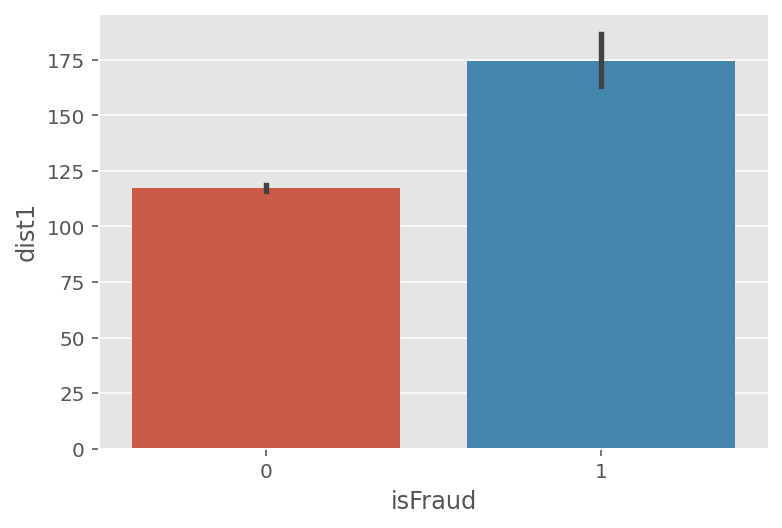

In [ ]:
sns.barplot(x='isFraud', y='dist1', data=train)

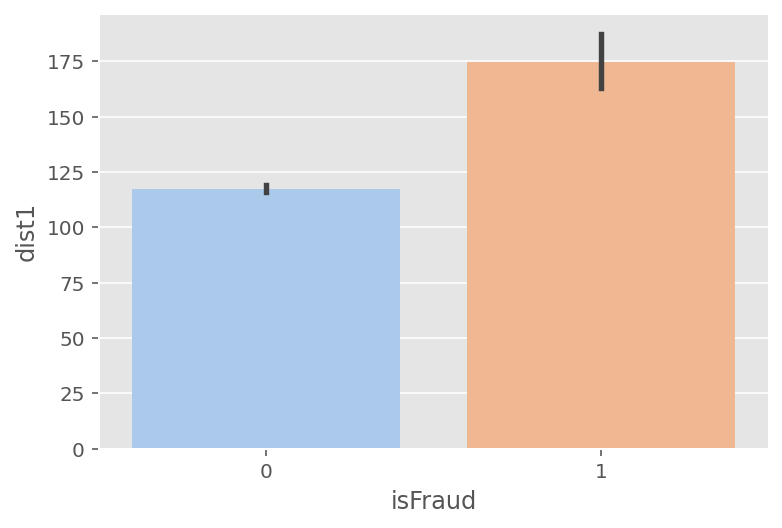

In [ ]:
sns.set_palette("pastel")
sns.barplot(x='isFraud', y='dist1', data=train)

In [ ]:
for col in list_A:
    sns.barplot(x='isFraud', y=col, estimator=len, data=train)
    plt.title('Feature: '+ col + '(normalization, bin)', fontsize = 20) # 그래프 타이틀: feature name(normalization, bin)
    plt.show()

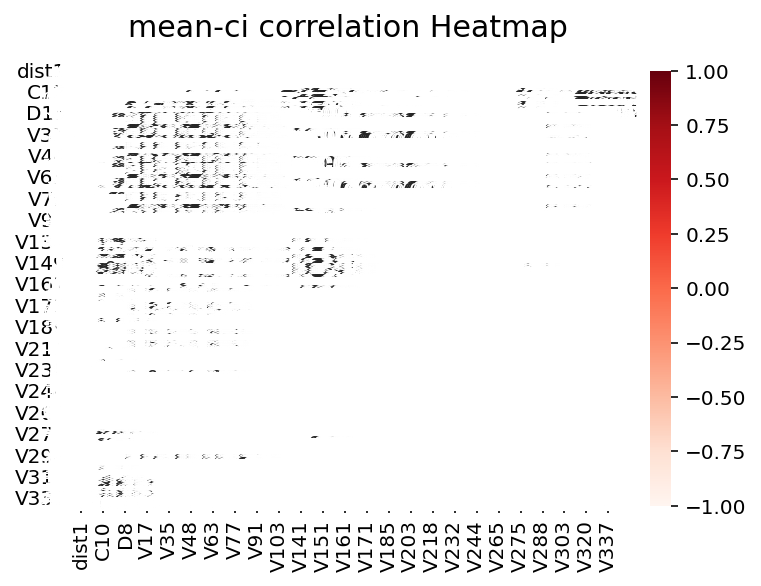

In [ ]:
# Feature Selcetion한 변수를 Heatmap으로 시각화 
list_A.append('isFraud') # corr 분석을 위해 target변수인 'isFraud' 추가

plt.title('Mean_Ci correlation Heatmap', y = 1.05, size = 15)
sns.heatmap(train[list_A].corr(), cmap = 'Reds', vmin = -1, vmax=1, annot = True)

In [ ]:
# 높은 상관계수를 찾는 함수
# 출처 : http://daplus.net/python-pandas%EC%9D%98-%ED%81%B0-%EC%83%81%EA%B4%80-%ED%96%89%EB%A0%AC%EC%97%90%EC%84%9C-%EA%B0%80%EC%9E%A5-%EB%86%92%EC%9D%80-%EC%83%81%EA%B4%80-%EC%8C%8D%EC%9D%84-%EB%82%98%EC%97%B4-%ED%95%98

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_all_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

In [ ]:
print('Top 20 Absolute Correlations')
print(get_top_abs_correlations(train[num_cols], 20))

Top 20 Absolute Correlations
D4    D12     0.999999
V95   V322    0.999949
V96   V323    0.999948
V97   V324    0.999947
V101  V322    0.999698
V279  V322    0.999624
V95   V101    0.999594
V279  V293    0.999568
C7    C12     0.999489
V280  V324    0.999464
V293  V322    0.999403
V167  V177    0.999364
V103  V324    0.999258
V105  V329    0.999101
V101  V293    0.998919
V102  V323    0.998828
V295  V324    0.998827
V97   V103    0.998789
V95   V279    0.998710
V280  V295    0.998623
dtype: float64


In [ ]:
# V로 시작하는 칼럼 찾기

list_A_V = [col for col in list_A if 'V' in col]
print(list_A_V)
print(f'list의 길이는 {len(list_A_V)}입니다.')

['V10', 'V11', 'V12', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V57', 'V58', 'V59', 'V60', 'V63', 'V64', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V84', 'V85', 'V86', 'V87', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V101', 'V102', 'V103', 'V126', 'V129', 'V131', 'V132', 'V133', 'V134', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V209', 'V211', 'V212'

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns
vif

Catergorical variable 분석

In [ ]:
# catergorical data를 포함한 column의 이름을 list화
cat_cols = list(train.select_dtypes(include=['object']).columns) # categorical 변수가 들어간 columns를 labeling
cat_cols

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id-12',
 'id-15',
 'id-16',
 'id-23',
 'id-27',
 'id-28',
 'id-29',
 'id-30',
 'id-31',
 'id-33',
 'id-34',
 'id-35',
 'id-36',
 'id-37',
 'id-38',
 'DeviceType',
 'DeviceInfo']

In [ ]:
train[cat_cols].count() # 결측치 제외한 갯수가 같으면 같은 기준으로 작성될 가능성이 높다!

ProductCD        590540
card4            588963
card6            588969
P_emaildomain    496084
R_emaildomain    137291
M1               319440
M2               319440
M3               319440
M4               309096
M5               240058
M6               421180
M7               244275
M8               244288
M9               244288
id-12                 0
id-15                 0
id-16                 0
id-23                 0
id-27                 0
id-28                 0
id-29                 0
id-30                 0
id-31                 0
id-33                 0
id-34                 0
id-35                 0
id-36                 0
id-37                 0
id-38                 0
DeviceType            0
DeviceInfo            0
dtype: int64

In [ ]:
train['DeviceType']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
590535    NaN
590536    NaN
590537    NaN
590538    NaN
590539    NaN
Name: DeviceType, Length: 590540, dtype: object

In [ ]:
train[['card4','card6']]

,card4,card6
0,discover,credit
1,mastercard,credit
2,visa,debit
3,mastercard,debit
4,mastercard,credit
...,...,...
590535,visa,debit
590536,mastercard,debit
590537,mastercard,debit
590538,mastercard,debit


In [ ]:
train['card4'].isnull().sum()

1577

In [ ]:
train['card6'].isnull().sum()

1571

In [ ]:
train[['M1','M2','M3']]

,M1,M2,M3
0,T,T,T
1,NaN,NaN,NaN
2,T,T,T
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
590535,T,T,T
590536,T,F,F
590537,T,F,F
590538,T,T,T


In [ ]:
train[['M8','M9']]

,M8,M9
0,NaN,NaN
1,NaN,NaN
2,F,F
3,NaN,NaN
4,NaN,NaN
...,...,...
590535,F,T
590536,F,F
590537,NaN,NaN
590538,NaN,NaN


In [ ]:
train['M8'].value_counts()

F    155251
T     89037
Name: M8, dtype: int64

In [ ]:
train['M9'].value_counts()

T    205656
F     38632
Name: M9, dtype: int64

In [ ]:
train['M2'].value_counts()

T    285468
F     33972
Name: M2, dtype: int64

In [ ]:
train['M3'].value_counts()

T    251731
F     67709
Name: M3, dtype: int64

In [ ]:
train[num_cols].count().value_counts() # numercial variable까지 확장 가능

130430    46
590226    43
590528    32
139631    31
0         23
514467    23
513444    22
501376    20
139819    19
82351     18
81945     18
421571    18
590540    18
141416    16
311253    12
589271    12
81951     11
524834     2
74926      2
38917      1
309743     1
588975     1
586281     1
238269     1
37627      1
327662     1
421618     1
280699     1
73187      1
501427     1
62187      1
61952      1
581607     1
514518     1
64717      1
dtype: int64

In [ ]:
train.describe(include='all')

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540,590540.000000,581607.000000,588975.000000,588963,586281.000000,588969,524834.000000,524834.000000,238269.000000,37627.000000,496084,137291,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,319440,319440,319440,309096,240058,421180,244275,244288,244288,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501

In [ ]:
train[['id-07','id-08']] # 유효값의 수가 5155개로 같음

,id-07,id-08
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
590535,NaN,NaN
590536,NaN,NaN
590537,NaN,NaN
590538,NaN,NaN


In [ ]:
train[num_cols].corr()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-13,id-14,id-17,id-18,id-19,id-20,id-21,id-22,id-24,id-25,id-26,id-32
TransactionID,1.000000,0.998280,0.012025,0.010122,-0.019900,-0.010091,-0.023900,-0.000370,0.057213,-0.027043,-0.026273,-0.053154,-0.055186,-0.008896,-0.057235,0.024444,-0.050376,-0.059485,-0.060490,0.033460,-0.062073,-0.054122,-0.058796,-0.017455,-0.043123,0.074338,0.026477,-0.006997,0.058633,0.002053,0.081941,-0.071569,-0.071505,-0.015457,0.056533,0.100242,0.052536,0.023352,0.095742,0.071285,0.001609,0.043721,0.044101,0.036061,0.033277,0.037936,0.037899,0.036606,0.035126,0.012900,0.015073,0.095513,0.093682,-0.003049,-0.027305,-0.030358,-0.018493,-0.020758,0.012811,0.004417,-0.018802,-0.017885,-0.001733,-0.001529,0.008267,0.001800,-0.006796,-0.004716,0.013342,0.014974,-0.030654,-0.033514,-0.011654,0.001312,0.122415,0.119793,-0.011573,-0.003462,-0.054059,-0.045949,-0.001940,-0.060570,-0.050184,-0.006123,-0.003488,-0.022559,-0.020398,0.033435,0.033073,-0.073398,-0.035869,-0.025255,0.109545,0.106413,0.005278,0.021741,-0.039267,-0.031172,-0.022812,-0.015934,0.015731,0.014385,-0.023153,-0.012838,-0.003834,0.005375,0.006396,-0.003225,0.014323,0.015880,-0.035108,-0.027716,-0.022403,-0.007149,0.101272,0.098428,-0.002823,0.017021,-0.029226,-4.314124e-02,-0.033431,0.009284,0.008316,-0.045756,-0.028955,-0.000726,0.003122,-2.152710e-03,-0.004515,0.022317,0.022916,-0.054259,-0.044316,-0.024978,0.059641,0.066849,0.067562,0.018179,0.075549,0.064023,0.058758,0.062462,0.065413,0.061837,0.071223,0.071692,-0.022165,0.004815,0.030843,0.015882,-0.005594,0.008128,-0.001196,0.014165,0.051740,0.028589,-0.011014,0.006492,-0.005405,-0.007017,0.019939,0.004401,0.009696,0.058098,0.038253,0.058853,0.066398,0.066591,0.004234,0.067183,0.041028,0.058108,0.061456,0.064225,0.019901,0.058545,0.044327,-0.007022,0.038760,0.044782,0.022475,0.037229,0.157087,-0.248605,-0.273548,0.061851,0.059484,0.042271,0.042437,-0.306317,-0.303988,-0.237093,0.039431,0.041361,0.041873,0.041688,0.050565,0.051548,-0.302742,-0.282572,-0.014603,0.003533,-0.010569,0.167661,0.064338,-0.154957,0.135566,0.146449,0.016365,0.039247,0.137835,-0.023858,-0.012754,0.090709,0.163273,0.018667,0.134468,0.143376,0.148628

In [ ]:
# LabelEncoder 사용
for col in cat_cols:
    if col in train.columns:
        le = preprocessing.LabelEncoder()
        train[col] = le.fit_transform(list(train[col].values))

In [ ]:
# test_id의 columns의 하이픈을 언더바로 바꾸는 작업
columns=[]
for idx, col in enumerate(test_id.columns):

    if "-" in col:
        col =col.replace("-","_")
    columns.append(col)

test_id.columns = columns

**Transaction Table**

* TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
* *TransactionAMT: transaction payment amount in USD*
* ProductCD: product code, the product for each transaction
* card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
* *addr: address*
* *dist: distance*
* P_ and (R__) emaildomain: purchaser and recipient email domain
* C1~C14: counting, such as how many addresses are found to be associated with the payment card, etc. *The actual meaning is masked.*
* D1~D15: timedelta, such as days between previous transaction, etc.
* M1-M9: match, such as names on card and address, etc.
* Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

**Identity Table**

* Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
* They're collected by Vesta’s fraud protection system and digital security partners. (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

* Categorical Feature
* DeviceType
* DeviceInfo
* id_12~id_38

## EDA

In [ ]:
train.shape

(590540, 434)

In [ ]:
train.isFraud.value_counts() # 0이 정상, 1이 사기

0    569877
1     20663
Name: isFraud, dtype: int64

In [ ]:
train.groupby('isFraud').mean()['TransactionAmt'].to_frame()

,TransactionAmt
isFraud,
0,134.50
1,149.25


정상거래와 사기거래 사이의 평균 거래액 차이는 유의미하지 않음

In [ ]:
cond = ~train.isnull().any()
survived_columns_mean = train.loc[: ,cond].groupby('isFraud').mean()
survived_columns_mean.drop(['TransactionID','TransactionDT'], axis=1, inplace=True)

In [ ]:
survived_columns_mean

,TransactionAmt,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
isFraud,,,,,,,,,,,,,,,,
0,134.50,9911.464381,13.31250,14.171875,0.005840,3.693359,5.722656,8.789062,2.517578,4.562500,4.582031,4.722656,9.750000,3.548828,32.81250,8.218750
1,149.25,9547.654164,35.53125,45.500000,0.000242,15.078125,1.406250,16.921875,11.976562,21.234375,1.704102,19.500000,23.859375,18.593750,24.96875,10.359375


In [ ]:
survived = train.loc[: ,cond]
survived.corr().loc['isFraud'].drop('isFraud') # 딱히 유의미한 상관관계가 나오지 않음

TransactionID     0.014166
TransactionDT     0.013103
TransactionAmt    0.011320
card1            -0.013640
C1                0.030570
C2                0.037229
C3               -0.006833
C4                0.030382
C5               -0.030754
C6                0.020909
C7                0.028161
C8                0.032138
C9               -0.031703
C10               0.028396
C11               0.027484
C12               0.031905
C13              -0.011146
C14               0.007921
Name: isFraud, dtype: float64

<Figure size 1152x864 with 0 Axes>

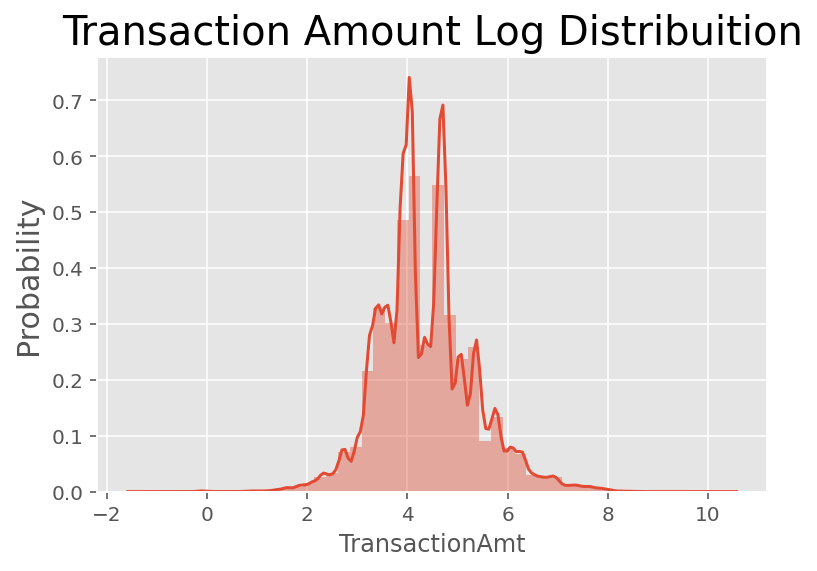

<Figure size 1152x864 with 0 Axes>

In [ ]:
sns.distplot(np.log(train['TransactionAmt']))
plt.title('Transaction Amount Log Distribuition', fontsize = 20)
plt.ylabel('Probability', fontsize=15)
plt.figure(figsize=(16,12))

## Preprocessing

### 결측치율(missing ratio) 측정 및 Drop

In [ ]:
data_null = train.isnull().sum()/train.shape[0] * 100
data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending=False) # '결측치가 없는 칼럼'을 비율에서 제외
missing_data = pd.DataFrame({'Missing Ratio' : data_null})
missing_data

,Missing Ratio
DeviceInfo,100.000000
id-12,100.000000
id-23,100.000000
id-22,100.000000
id-21,100.000000
...,...
V285,0.002032
V284,0.002032
V280,0.002032
V279,0.002032


In [ ]:
for i in reversed(range(10, 100, 5)) :
    print(f'결측치율 {i}% 이상 갯수 : {missing_data[data_null > i].shape[0]}')

결측치율 95% 이상 갯수 : 9
결측치율 90% 이상 갯수 : 12
결측치율 85% 이상 갯수 : 74
결측치율 80% 이상 갯수 : 74
결측치율 75% 이상 갯수 : 208
결측치율 70% 이상 갯수 : 208
결측치율 65% 이상 갯수 : 208
결측치율 60% 이상 갯수 : 208
결측치율 55% 이상 갯수 : 213
결측치율 50% 이상 갯수 : 214
결측치율 45% 이상 갯수 : 231
결측치율 40% 이상 갯수 : 232
결측치율 35% 이상 갯수 : 232
결측치율 30% 이상 갯수 : 232
결측치율 25% 이상 갯수 : 252
결측치율 20% 이상 갯수 : 252
결측치율 15% 이상 갯수 : 274
결측치율 10% 이상 갯수 : 322


결측치율 75%~80% 이상 갯수 추가로 확인

In [ ]:
for i in range(80, 74, -1) :
    print(f'결측치율 {i}% 이상 갯수 : {missing_data[data_null > i].shape[0]}')

결측치율 80% 이상 갯수 : 74
결측치율 79% 이상 갯수 : 75
결측치율 78% 이상 갯수 : 77
결측치율 77% 이상 갯수 : 123
결측치율 76% 이상 갯수 : 206
결측치율 75% 이상 갯수 : 208


Text(0, 0.5, 'Missing rate')

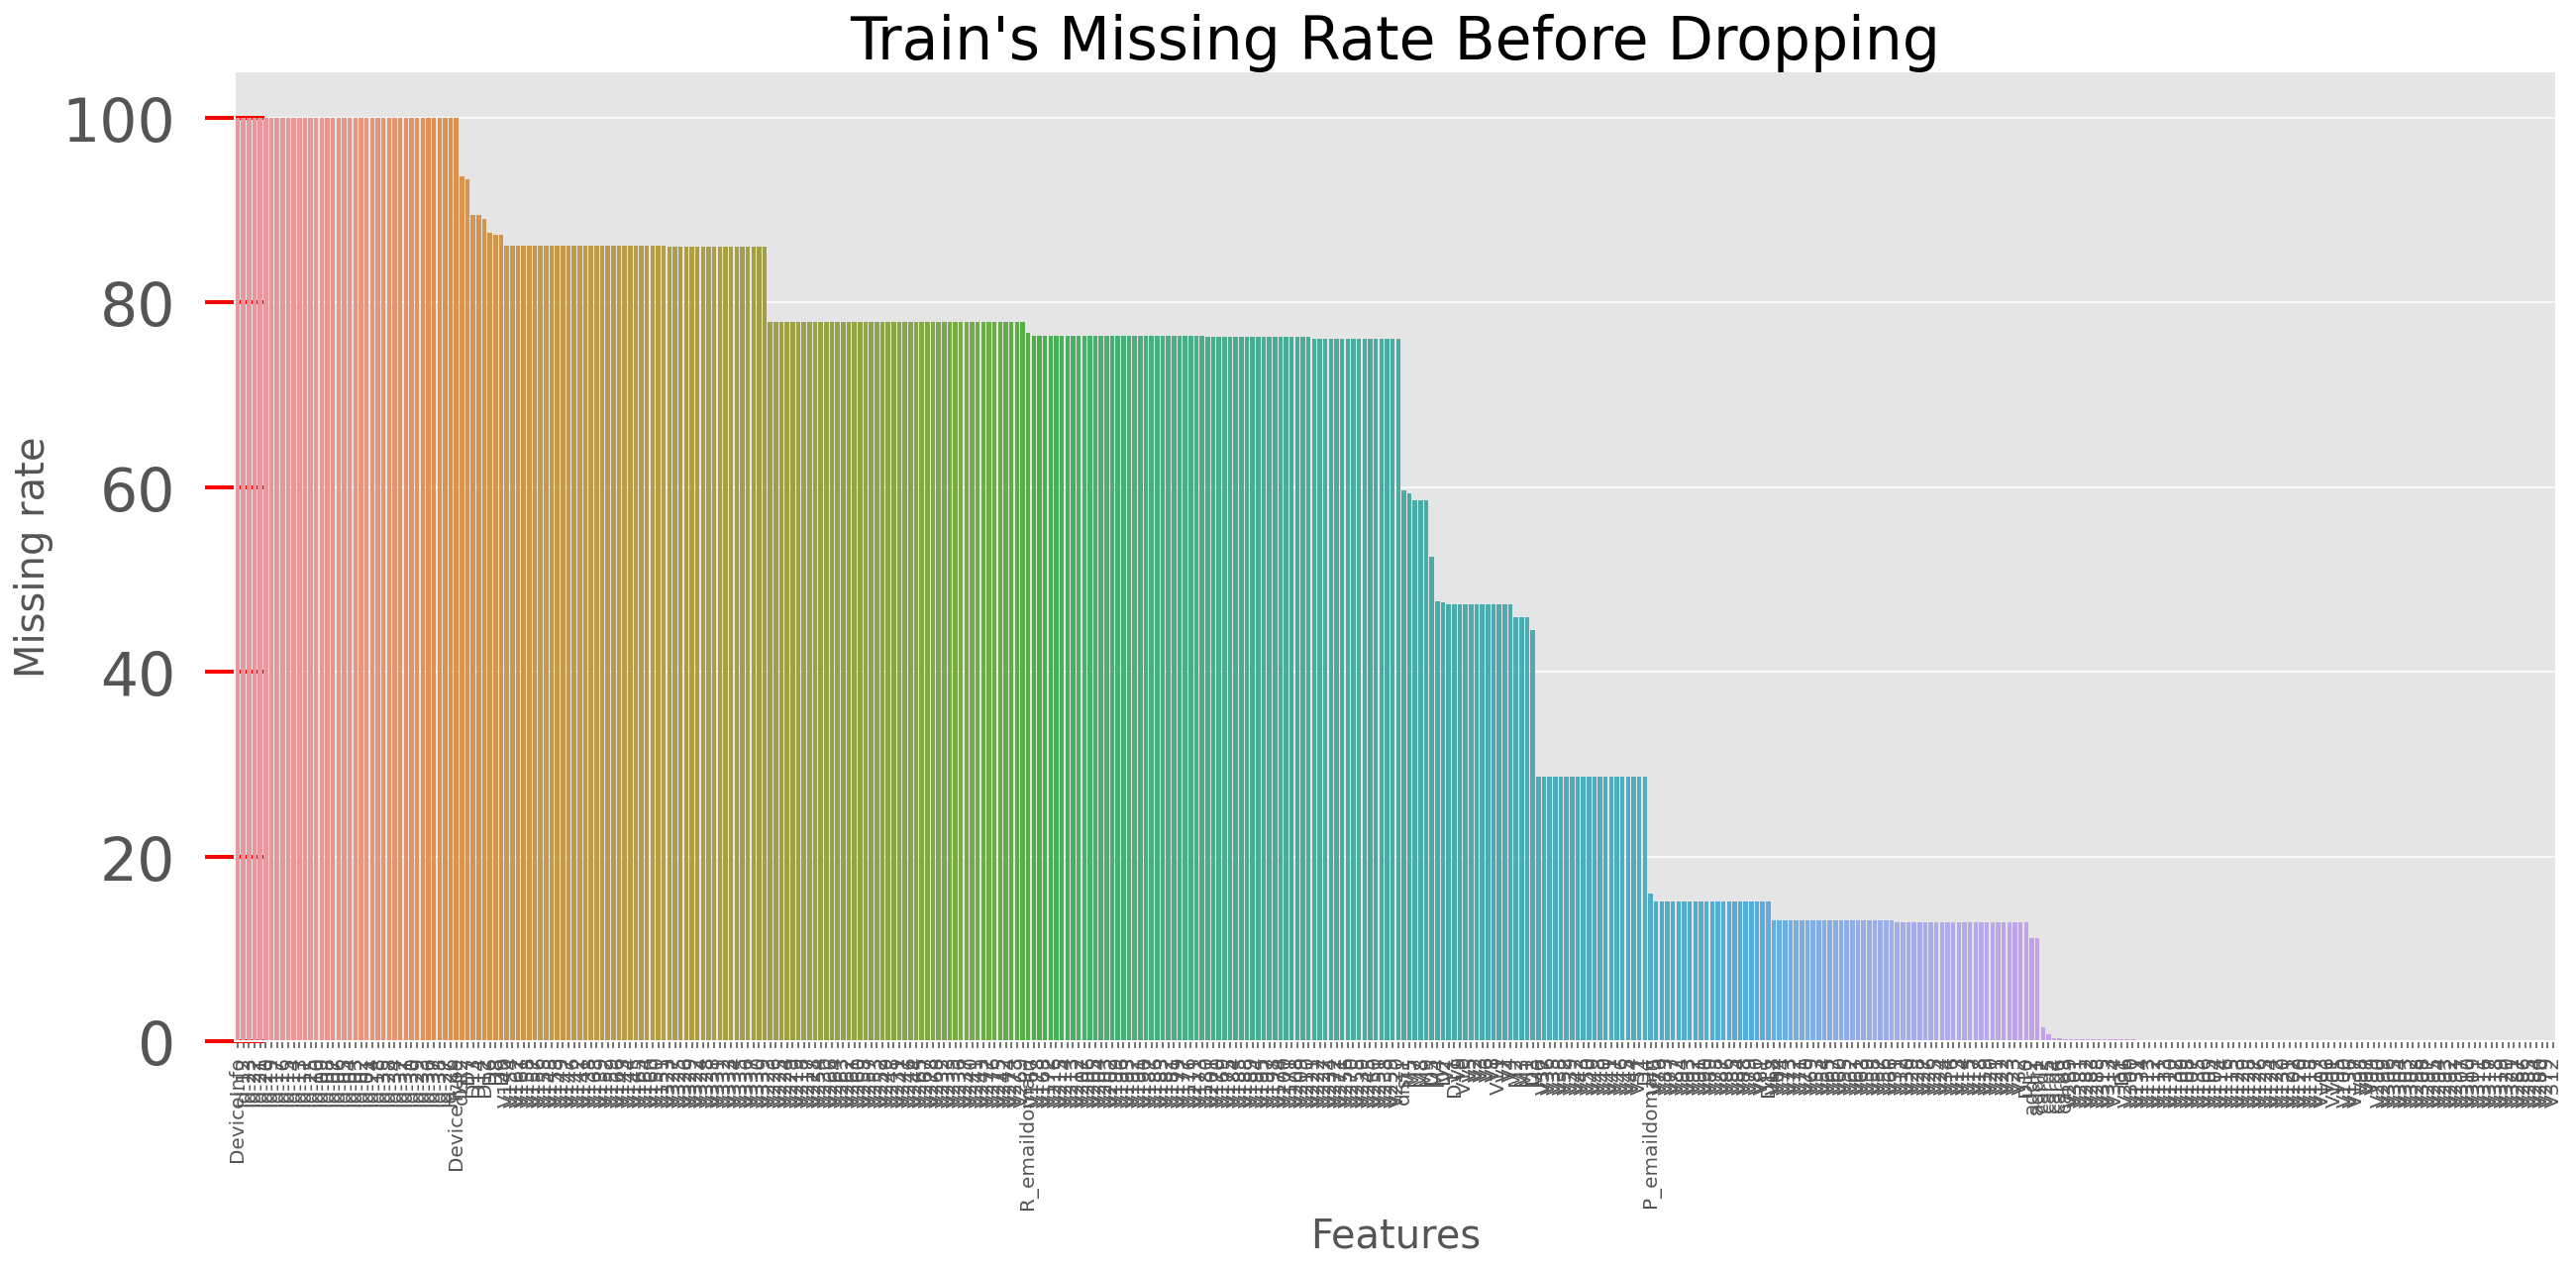

In [ ]:
# drop 전 시각화
plt.figure(figsize=(21,9))
plt.xticks(rotation='90')
sns.barplot(data_null.index, data_null)
plt.tick_params(axis='y', direction='inout', length=30, pad=15, labelsize=30, width=2, color='r') # ytick이 잘 안보여서 설정
plt.grid(True, axis='y')
plt.title("Train's Missing Rate Before Dropping", fontsize = 30)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Missing rate', fontsize=20)

###### *결측치 76% 이상인 columns을 drop한다*

In [ ]:
train = train.drop(missing_data[data_null > 76].index, axis = 1)
test = test.drop(missing_data[data_null > 76].index, axis = 1)

In [ ]:
# id 두 개만 남았으니까 다 날린다
train = train.drop(['id_01', 'id_12'], axis = 1)
test = test.drop(['id_01', 'id_12'], axis =1)

Text(0, 0.5, 'Missing rate')

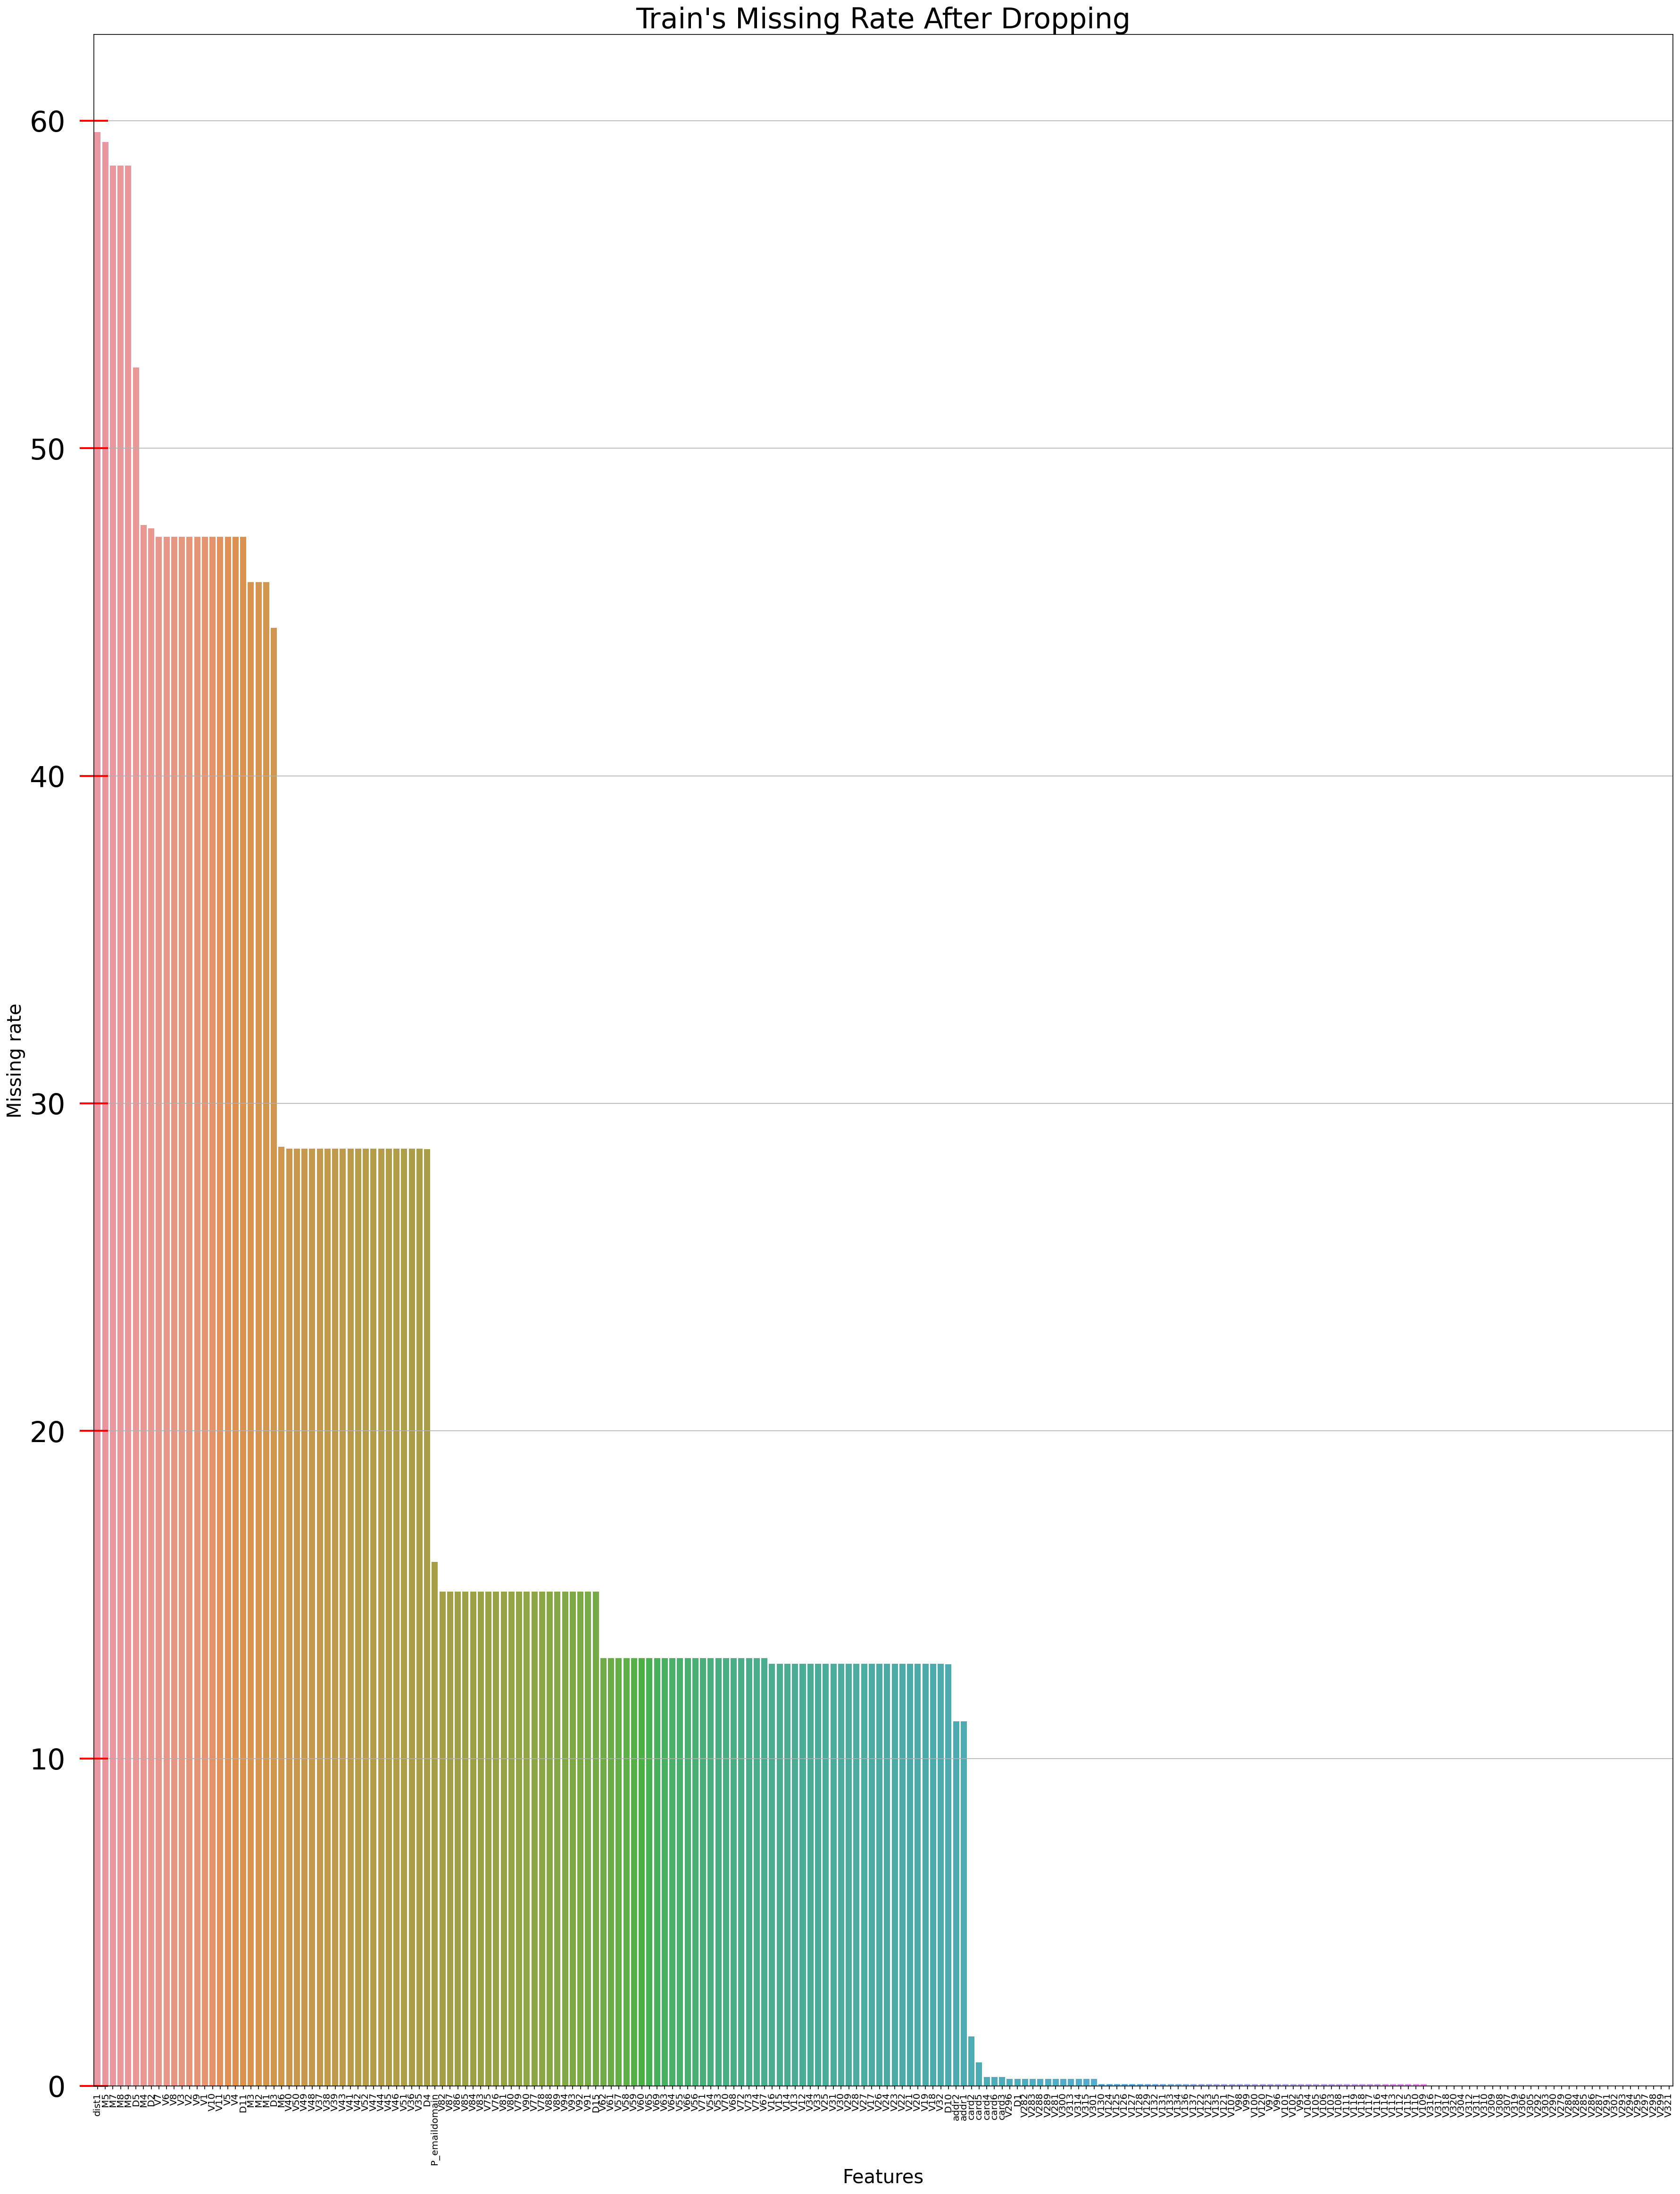

In [ ]:
# drop 후 시각화
data_null = train.isnull().sum()/train.shape[0] * 100
data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending=False)
plt.figure(figsize=(16,9))
plt.xticks(rotation='90')
sns.barplot(data_null.index, data_null)
plt.tick_params(axis='y', direction='inout', length=30, pad=15, labelsize=30, width=2, color='r')
plt.grid(True, axis='y')
plt.title("Train's Missing Rate After Dropping", fontsize = 30)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Missing rate', fontsize=20)

## 데이터 라벨링 및 스케일링

### Outlier 제거

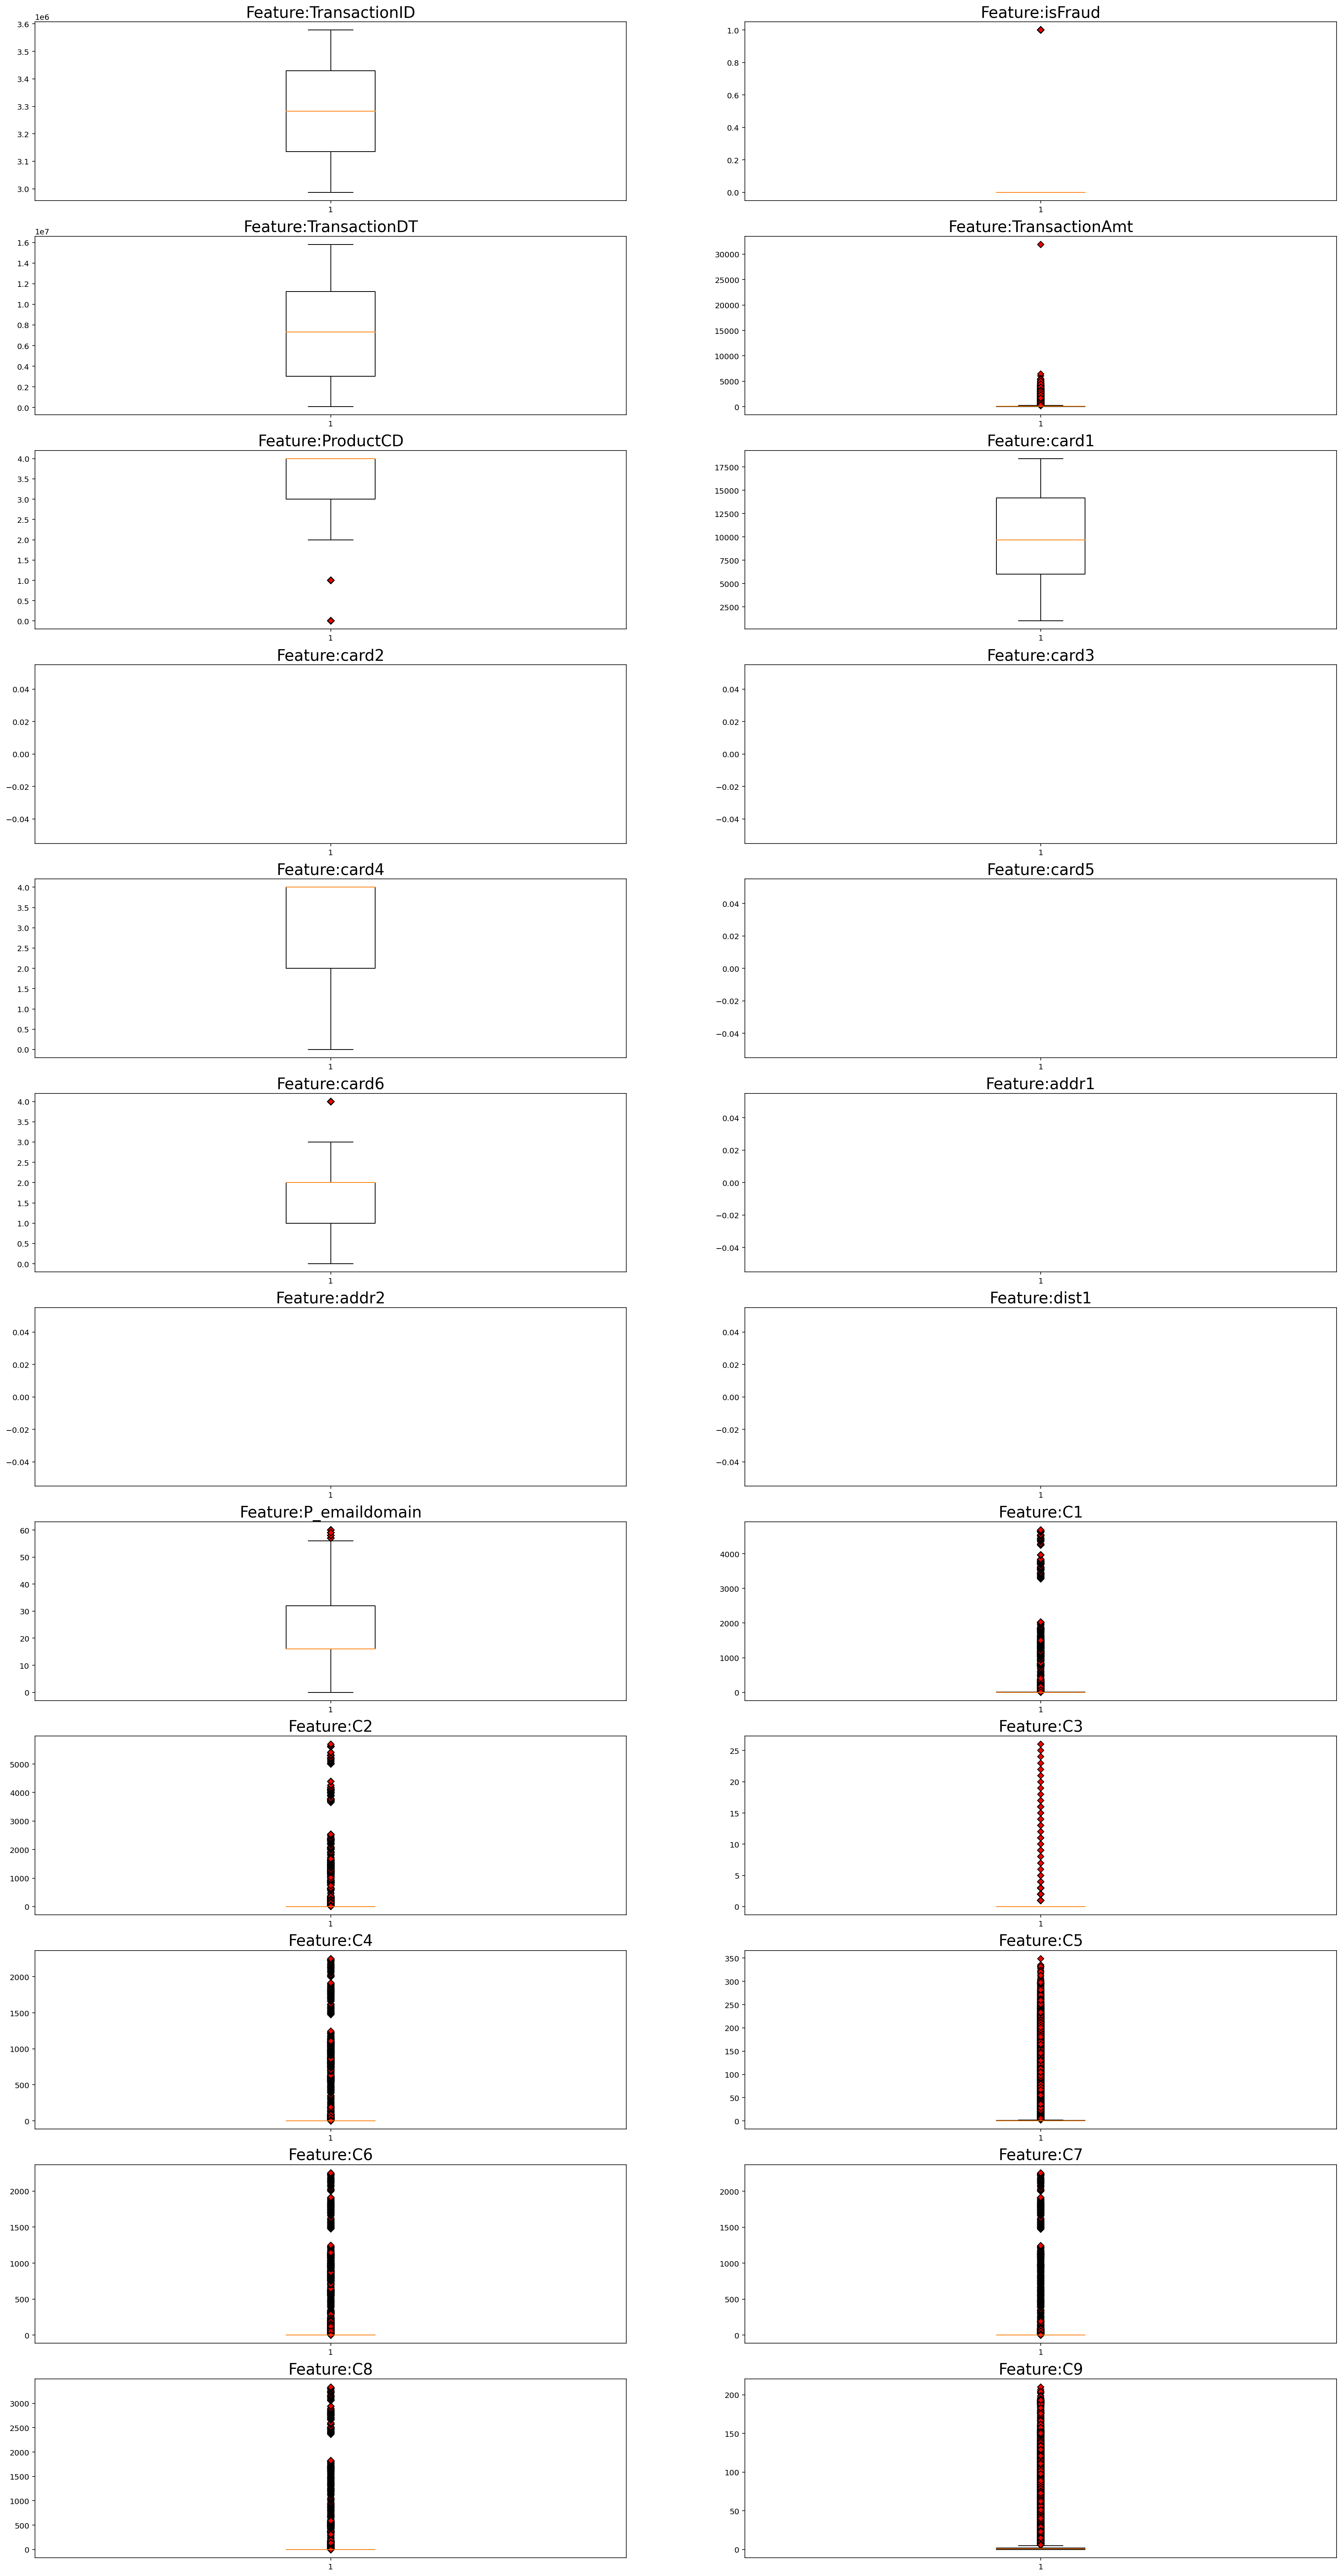

In [ ]:
plt.figure(figsize=(30, 60))
for col_idx in range(24) :
    # 6행 2열 서브플롯에 각 feature 박스플롯 시각화 -> 24개의 feature만 sampling으로 뽑아봄
    plt.subplot(12, 2, col_idx+1)
    # flierprops: 빨간색 다이아몬드 모양으로 아웃라이어 시각화
    plt.boxplot(train[train.columns[col_idx]], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
    plt.title('Feature:' + train.columns[col_idx], fontsize = 20)
plt.show()

sampling으로 확인한 결과, 정상적인 boxplot이 그러지지 않음으로 outlier 제거는 고려하지 않는다.

In [ ]:
train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [ ]:
feature_name = train.columns.drop('isFraud') # 'isFraud'를 제외한 설명변수
for col_idx in range(len(feature_name)):
    plt.hist(train[train['isFraud'] == 0][feature_name[col_idx]], label = 'normal', alpha = 0.5)
    plt.hist(train[train['isFraud'] == 1][feature_name[col_idx]], label = 'fraud', alpha = 0.5)
    plt.legend()
    # 그래프 타이틀: feature name
    plt.title('Feature: '+ feature_name[col_idx], fontsize = 20)
    plt.show()

In [ ]:
# Kernel Density Estimation
for col_idx in range(len(feature_name)):
    sns.kdeplot(x=feature_name[col_idx], hue='isFraud', shade=True, data=train)
    plt.title('Feature: '+ feature_name[col_idx], fontsize = 20)
    plt.show()

In [ ]:
for feature_name in ['card6', 'addr2', 'V1', 'V13', 'V23', 'V44', 'V111', 'V112', 'V113', 'V114', 'V116', 'V123', 'V125']:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    g1 = plt.hist(train[train['isFraud'] == 0][feature_name], label = 'normal', alpha = 0.5)
    g1 = plt.hist(train[train['isFraud'] == 1][feature_name], label = 'fraud', alpha = 0.5)
    g1 = plt.title('Feature: '+ feature_name + ' (Histogram)', fontsize = 20)
    plt.legend()
    
    plt.subplot(122)
    g2 = sns.kdeplot(x=feature_name, hue='isFraud', shade=True, data=train)
    g2 = plt.title('Feature: '+ feature_name + ' (KDE plot)', fontsize = 20)

    plt.show()

### X, y 분리 

In [ ]:
# X, y 분리
X = train.drop('isFraud', axis=1)
y = train['isFraud']

X_test = test

del train
gc.collect()
print('Successfully collected!')

Successfully collected!


모델돌리기

LabelEncoder

In [ ]:
# Merge X_test and X_train to do feature engineering. 
 
all_data_temp = pd.concat([X_train, X_test])
for i,f in enumerate(all_data_temp.columns):
    if (np.str(all_data_temp[f].dtype)=='category')|(all_data_temp[f].dtype=='object'): 
        lbl = LabelEncoder()
        all_data_temp[f] = lbl.fit_transform(all_data_temp[f].astype(str))
    gc.collect()

KNNImputer

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights ='distance')

gc.collect()
temp_all_data_temp = pd.DataFrame(imputer.fit_transform(all_data_temp))
temp_all_data_temp.columns=all_data_temp.columns
temp_all_data_temp.index=all_data_temp.index

all_data_temp = temp_all_data_temp

del temp_all_data_temp
gc.collect()